<a href="https://colab.research.google.com/github/elizabethyoo/team_9/blob/eda_mapping/eda_covid_rate_choropleth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mapping COVID Rates

Use Folium to map the covid rates across time



#Setup

**Mount Google Drive**

To have access to the shared group 9 project folder, first create a shortcut to it in your drive. Then run the cell below to mount your google drive and follow the prompt to get the code.

In [95]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [96]:
!pip install folium

In [97]:
# Imports
import numpy as np
import pandas as pd
import time
import folium
import json
import requests

## Import the dataset

In [98]:
df = pd.read_csv('/content/gdrive/MyDrive/team_9/Datasets/hps_sbps_unemp_vac.csv')
df = df.rename(columns= {'Date': 'date',"new_cases_per_1_mill_pop": 'rate'})
df.loc[df['state'] == "CA"].head()
df['rate'] = df['rate']/100


Check what the dates are for the last day of each month

In [99]:
dates = list(df['date'].unique())
dates

['2020-04-30',
 '2020-05-31',
 '2020-06-30',
 '2020-08-31',
 '2020-09-30',
 '2020-10-31',
 '2020-11-30',
 '2020-12-31',
 '2021-01-31',
 '2021-02-28',
 '2021-03-31',
 '2021-04-30',
 '2021-05-31',
 '2021-06-30',
 '2021-07-31',
 '2021-08-31']

## Mapping Function

In [100]:
bins = list(df['rate'].quantile([0,0.2,.4, .6,.8,1]))
bins

[0.26296973857965067,
 17.69293496593147,
 34.05508720291979,
 54.26983931887976,
 106.91973064313423,
 452.26176616242583]

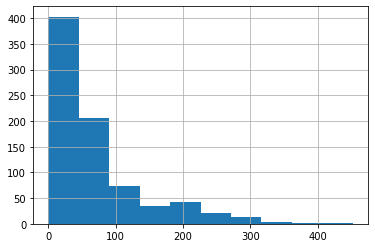

In [101]:
df['rate'].hist()

In [102]:
def make_map(df, date, factor, legend_title, map_title):
  
  bins = list(df[factor].quantile([0,0.2,.4, .6,.8,1]))

  data = df.loc[df['date'] == date].drop(columns = 'date').copy()

  url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
  state_geo = f"{url}/us-states.json"

  m = folium.Map(location=[40, -95], zoom_start= 4, max_zoom=4, tiles = 'cartodb positron',height= 500, width=700)

  folium.Choropleth(
      geo_data = state_geo,
      name = "choropleth",
      data = data,
      columns = ["state", factor],
      key_on = "feature.id",
      fill_color = 'YlOrRd',
      fill_opacity = 0.8, 
      line_opacity = 0.5,
      legend_name = legend_title, 
      bins = bins,
      reset = True
  ).add_to(m)

  title = ('<h3 align="left" style="font-size:20px"><b>'+ map_title + '</b></h3>')
  m.get_root().html.add_child(folium.Element(title))

  return m

## Mapping Adjusted Expected Recovery Index

Selecting the dates of interest - the last three month of collected data(June-August 2021) and the same months one year earlier for comparison.

** data for july 2020 was not collected

In [103]:
dates = ['2020-06-30',
         '2020-08-31',
         '2021-06-30',
         '2021-07-31',
         '2021-08-31',
         ]

titles = ['June 2020',
          'August 2020',
          'June 2021',
          'July 2021',
          'August 2021',
          ]

In [104]:
make_map(df,dates[0],'rate', "Covid Rate per 100K", titles[0])

In [105]:
make_map(df,dates[1],'rate', "Covid Rate per 100K", titles[1])

In [106]:
make_map(df,dates[2],'rate', "Covid Rate per 100K", titles[2])

In [107]:
make_map(df,dates[3],'rate', "Covid Rate per 100K", titles[3])

In [108]:
make_map(df,dates[4],'rate', "Covid Rate per 100K", titles[4])